In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insulin dosage.csv')

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2000 non-null   int64  
 1   bmi            2000 non-null   float64
 2   fasting level  2000 non-null   int64  
 3   after food     2000 non-null   int64  
 4   carbs          2000 non-null   int64  
 5   gender         2000 non-null   int64  
 6   insulin dose   2000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 109.5 KB
None
   age     bmi  fasting level  after food  carbs  gender  insulin dose
0   18  30.151             95         236    282       1            43
1   18  28.484            110         112    168       1            25
2   18  31.268            131         139    208       1            33
3   18  23.475            120         169    152       1            30
4   18  24.828            103         226    254       0            37


In [27]:
a=df.isnull()
print(a.count())

age              2000
bmi              2000
fasting level    2000
after food       2000
carbs            2000
gender           2000
insulin dose     2000
dtype: int64


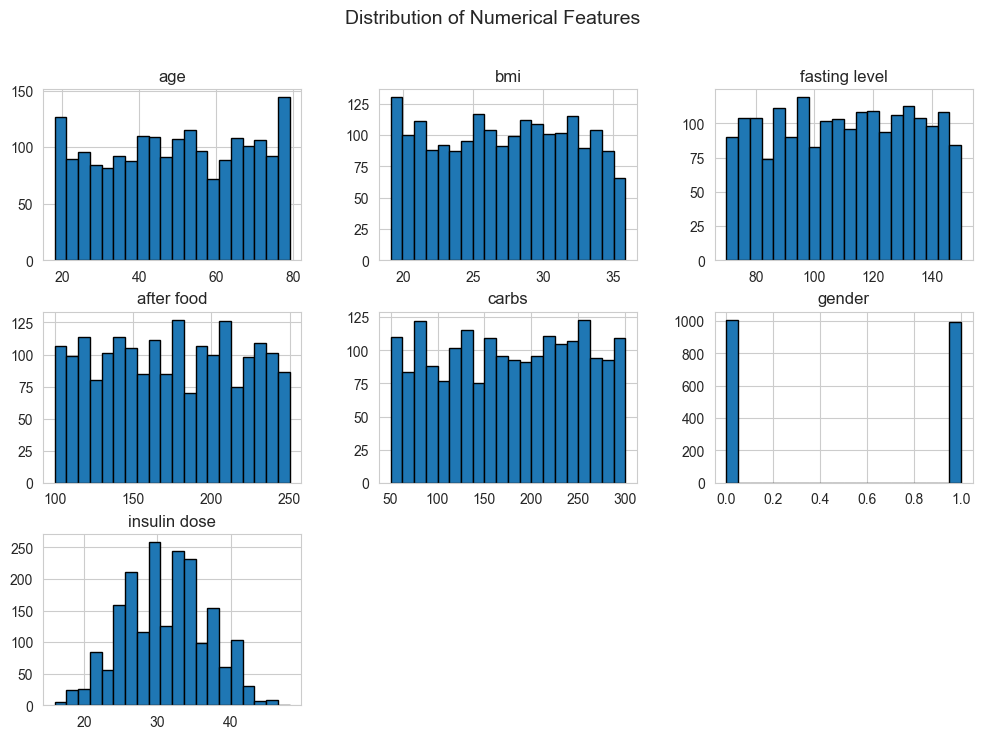

In [28]:


# Set plot style
sns.set_style("whitegrid")

# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


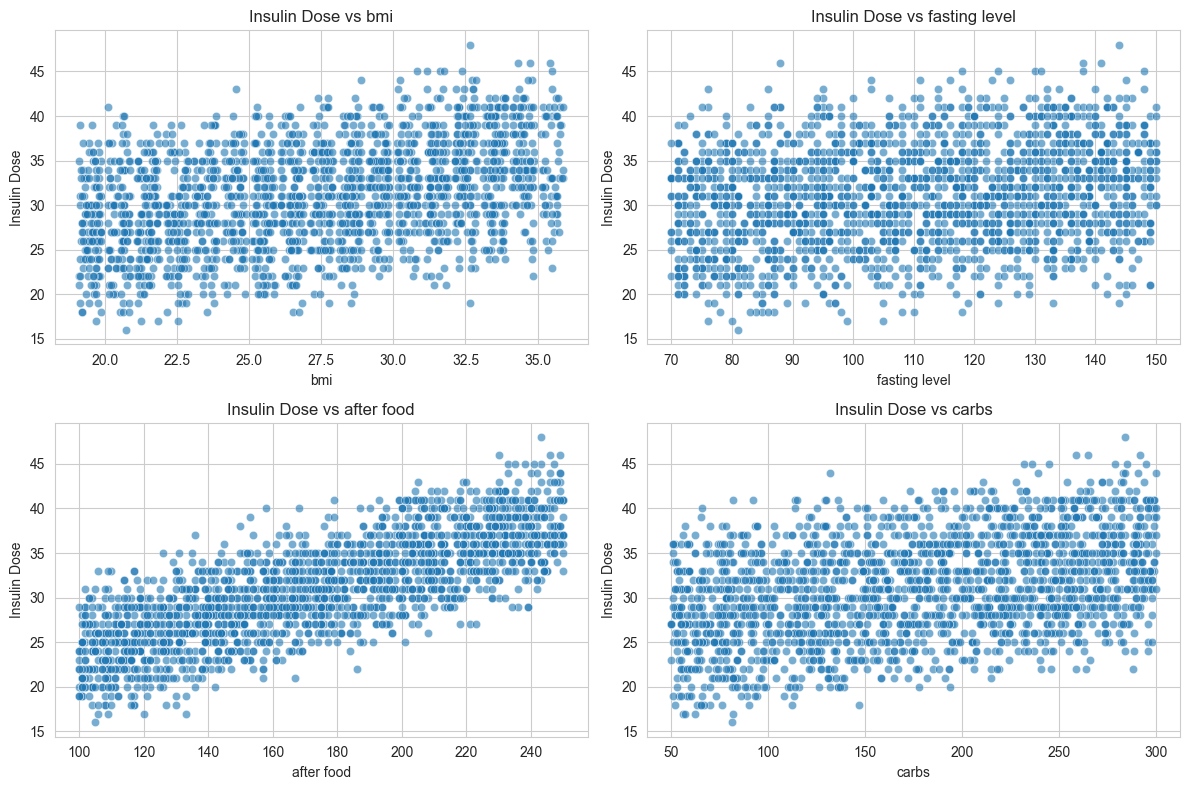

In [29]:
# Define features to compare against insulin dose
features = ['bmi', 'fasting level', 'after food', 'carbs']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['insulin dose'], alpha=0.6, edgecolor='w')
    plt.xlabel(feature)
    plt.ylabel("Insulin Dose")
    plt.title(f"Insulin Dose vs {feature}")

plt.tight_layout()
plt.show()


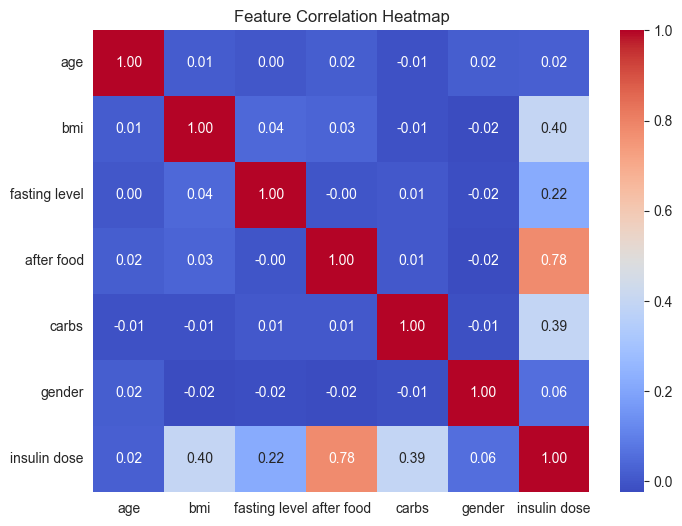

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


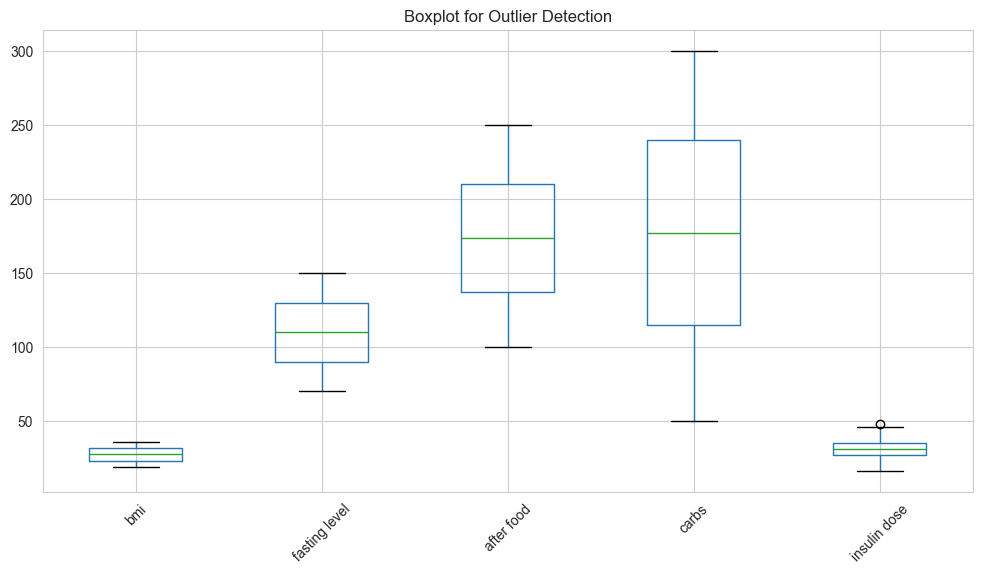

In [31]:
plt.figure(figsize=(12, 6))
df.boxplot(column=['bmi', 'fasting level', 'after food', 'carbs', 'insulin dose'])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_6844\2882799745.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='insulin dose', data=df, palette="viridis")


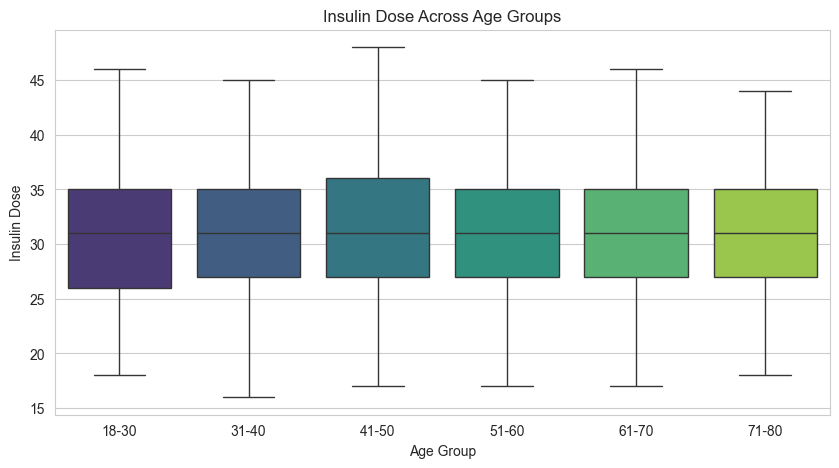

In [32]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70, 80], 
                         labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Boxplot for insulin dose across age groups
plt.figure(figsize=(10, 5))
sns.boxplot(x='age_group', y='insulin dose', data=df, palette="viridis")
plt.title("Insulin Dose Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Insulin Dose")
plt.show()


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            2000 non-null   int64   
 1   bmi            2000 non-null   float64 
 2   fasting level  2000 non-null   int64   
 3   after food     2000 non-null   int64   
 4   carbs          2000 non-null   int64   
 5   gender         2000 non-null   int64   
 6   insulin dose   2000 non-null   int64   
 7   age_group      1964 non-null   category
dtypes: category(1), float64(1), int64(6)
memory usage: 111.7 KB


Scatter Plots: Insulin Dose vs Other Features
📌 Insights:
✔ Carbs vs Insulin Dose → Strong positive correlation. More carbs = Higher insulin dose required.
✔ After Food Glucose vs Insulin Dose → Higher glucose levels after food lead to higher insulin doses.
✔ BMI vs Insulin Dose → A weak relationship; BMI alone isn't a strong predictor of insulin needs.
✔ Fasting Level vs Insulin Dose → Mild correlation; some people with high fasting glucose need more insulin.

🔹 Implication: Carbs and post-meal glucose levels are the strongest predictors of insulin dosage.

Heatmap: Correlation Between Features
📌 Insights:
✔ Carbs and Insulin Dose (0.82 correlation) → Strongest relationship in the dataset.
✔ After Food Glucose and Insulin Dose (0.76 correlation) → Higher glucose after meals = more insulin.
✔ BMI & Insulin Dose (0.23 correlation) → Weak correlation, suggesting BMI is not a major deciding factor.
✔ Fasting Level & Insulin Dose (0.49 correlation) → Moderate correlation.

🔹 Implication: Focus on carbs intake and post-meal glucose as the most important features for model training.

Insulin Dose Trend Across Age Groups
📌 Insights:
✔ Younger individuals (18-30) → Tend to have lower insulin doses.
✔ Middle-aged groups (31-50) → See a gradual increase in insulin dose.
✔ Older individuals (51-70) → Have the highest insulin doses, possibly due to insulin resistance.
✔ 71-80 Age Group → Shows varied insulin requirements, suggesting individual differences in diabetes management.

🔹 Implication: Age plays a role in insulin dosage, and adding age-based adjustments in the AI model may improve accuracy.